In [16]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from source.tserie import TSerie
from source.keras_utils import getPeaxFeatures
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [17]:
from source.datasets import loadFuncionalModel, loadNatops, loadWafer, loadSelfRegulationSCP2, loadBasicMotions, loadEarthquakes, loadItalyPowerDemand, loadEigenWorms
EPOCHS = 100
dataset = 'natops' # natops | wafer | selfreg | basicmotions | earthquakes | italy | eigenworms

if dataset == 'natops':
    X_train, y_train, X_test, y_test, classLabels = loadNatops()
elif dataset == 'wafer':
    X_train, y_train, X_test, y_test = loadWafer()
    classLabels = {}
elif dataset == 'basicmotions':
    X_train, y_train, X_test, y_test, classLabels= loadBasicMotions()
elif dataset == 'italy':
    X_train, y_train, X_test, y_test, classLabels= loadItalyPowerDemand()
# X = np.concatenate([X_train, X_test], axis=0).transpose([0, 2, 1])
# y = np.concatenate([y_train, y_test], axis=0)
# y = np.array([float(v) for v in y]).astype(int).tolist()

In [18]:
mts_train = TSerie(X=X_train.transpose([0, 2, 1]), y=y_train)
mts_test = TSerie(X=X_test.transpose([0, 2, 1]), y=y_test)

Loaded mts - N: 180, T: 51, D: 24 
Loaded mts - N: 180, T: 51, D: 24 


In [19]:
# mts.smooth(window_size=40)
# mts.shapeNormalizization()
minl, maxl = mts_train.minMaxNormalizization()
minl, maxl = mts_test.minMaxNormalizization(minl= minl, maxl=maxl)

In [20]:
mts_train.features, mts_test.features =  getPeaxFeatures(mts_train.X.transpose([0, 2, 1]), feat_size = 15, epochs =EPOCHS, batch_size = 32, X_test=mts_test.X.transpose([0, 2, 1]))


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 51, 1)]           0         
_________________________________________________________________
conv0 (Conv1D)               (None, 26, 120)           1200      
_________________________________________________________________
conv1 (Conv1D)               (None, 13, 120)           129720    
_________________________________________________________________
flatten (Flatten)            (None, 1560)              0         
_________________________________________________________________
fc2 (Dense)                  (None, 256)               399616    
_________________________________________________________________
fc3 (Dense)                  (None, 64)                16448     
_________________________________________________________________
fc4 (Dense)                  (None, 16)                1040

In [21]:
# print(mts.features.shape)
X_repr = []

for d in range(mts_train.D):
    if len(X_repr) == 0:
        X_repr = mts_train.features[:, d, :]
    else:
        X_repr = np.concatenate((X_repr, mts_train.features[:,d,:]), axis=1)
        
mts_train.features = X_repr

X_repr = []

for d in range(mts_test.D):
    if len(X_repr) == 0:
        X_repr = mts_test.features[:, d, :]
    else:
        X_repr = np.concatenate((X_repr, mts_test.features[:,d,:]), axis=1)
        
mts_test.features = X_repr
# print(mts.features.shape)

In [22]:
from sklearn import svm

clf = svm.SVC()
clf.fit(mts_train.features, mts_train.y)

print(clf.score(mts_train.features, mts_train.y))
print(clf.score(mts_test.features, mts_test.y))

0.8722222222222222
0.8222222222222222


/home/texs/anaconda3/envs/peax/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


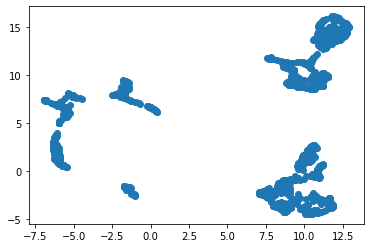

In [7]:
import umap

# reducer = umap.UMAP(n_components=2, metric='cosine')
reducer = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=15)
coords = reducer.fit_transform(mts.features)
import matplotlib.pyplot as plt
plt.scatter(coords[:, 0], coords[:, 1])

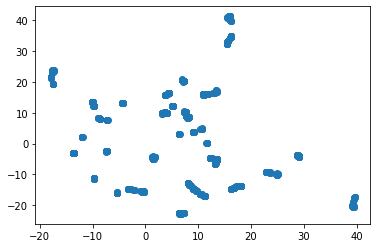

In [8]:
reducer = umap.UMAP(n_components=2, metric='braycurtis', n_neighbors=15)
coords_mean = reducer.fit_transform(mts.magnitudes)

plt.scatter(coords_mean[:, 0], coords_mean[:, 1])

Epoch 1/50
35/35 [==============================] - 1s 4ms/step - loss: 1.8735
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6694
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6471
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3881
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3474
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.3367
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2929
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2787
Epoch 9/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2704
Epoch 10/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2286
Epoch 11/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2190
Epoch 12/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1988
Epoch 13/50
35/35 [==============================

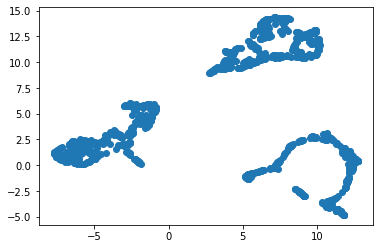

In [9]:
mts.features, _ =  getPeaxFeatures(mts.X_norm.transpose([0, 2, 1]), feat_size = 15, epochs =EPOCHS, batch_size = 32)
X_repr = []

for d in range(mts.D):
    if len(X_repr) == 0:
        X_repr = mts.features[:, d, :]
    else:
        X_repr = np.concatenate((X_repr, mts.features[:,d,:]), axis=1)
        
mts.features = X_repr
reducer = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=15)
coords_orig = reducer.fit_transform(mts.features)
plt.scatter(coords_orig[:, 0], coords_orig[:, 1])

In [10]:
import sys
sys.path.append('/home/texs/Documentos/Repositories/mts_viz')
from server.source.storage import MTSStorage

In [11]:
storage = MTSStorage('mts')    
# storage.delete()
storage.load()

# classLabels = {int(v): str(v) for v in np.unique(y)}
dimensions = [str(dim) for dim in range(mts.D)]
# dimensions = [sPoll, sPoll + '_norm']
# dimensions = pollutants + [poll + '_norm' for poll in pollutants]
data = np.concatenate([mts.X_orig, mts.X], axis=2) 
storage.add_mts(
    '{}_peax'.format(dataset),
    data, 
    dimensions = dimensions + [dim+ '_norm' for dim in dimensions], 
    labels = {'class': y},
    labelsNames = {'class': classLabels},
    coords = {
        'shape': coords,
        'magnitude': coords_mean,
        'original': coords_orig,
    },
    sampling=True,
    n_samples= 400
)



storage.save()

mts shape: N: 1096 -  T: 24 - D: 2
